In [1]:
library(PepsNMR)
library(devtools)
library(knitr)

Loading required package: usethis



### User Inputs: Working Directory Path and Data Set Root Directory.

In [2]:
# Check that setdir_path ends with '/'
setdir_path <- '/Users/morris/Box/Hall_Lab/Projects/HUNA/'
data_set_root_dir <- 'MTBLS424'
setwd(setdir_path)

### Creating the HUNA intialization file

In [3]:
path_to_fid <- (paste(setdir_path, data_set_root_dir, '/input/nmr',sep='')) 
norm_bin_500_path <- (paste(setdir_path, data_set_root_dir, '/',
                       'output/PepsNMR_output/',data_set_root_dir,
                       '_PepsNMR_preprocessed_bin500.csv', sep=''))
norm_bin_5000_path <- (paste(setdir_path ,data_set_root_dir, '/',
                       'output/PepsNMR_output/',data_set_root_dir,
                       '_PepsNMR_preprocessed_bin5000.csv', sep=''))
type <- c('setwd_path',
          'data_set_root_dir',
          'path_to_fid',
          'norm_bin_500_path',
          'norm_bin_5000_path')
path <- c(setdir_path,
          data_set_root_dir,
          path_to_fid,
          norm_bin_500_path,
          norm_bin_5000_path)
huna_init_file <- data.frame(type, path)
huna_init_path <- (paste(setdir_path,'/',data_set_root_dir, '/', data_set_root_dir,
                         '_init.csv', sep=''))
write.csv(huna_init_file, file= huna_init_path, row.names=FALSE)

In [5]:
# ==== set graphical parameters =================
# select the index of the spectrum that will be drawn
spectrIndex <- 1
# colors
col1 <-  "gray18"
col2 <- "firebrick1"

In [7]:
fidList <- ReadFids(file.path(path_to_fid),subdirs = TRUE, dirs.names = FALSE, verbose=TRUE)
Fid_data <- fidList[["Fid_data"]]
Fid_info <- fidList[["Fid_info"]]
kable(head(Fid_info))
#write.csv(Fid_data, file = "/Users/morris/Box/Hall_Lab/Projects/MTBLS_explore/MTBLS1/output/PepsNMR_output/Fid_data.csv")
#write.csv(Fid_info, file = "/Users/morris/Box/Hall_Lab/Projects/MTBLS_explore/MTBLS1/output/PepsNMR_output/Fid_info.csv")

Begin ReadFids 


Warning message in ReadFids(file.path(path_to_fid), subdirs = TRUE, dirs.names = FALSE, :
"No valid fid in /Users/morris/Box/Hall_Lab/Projects/HUNA/MTBLS424/input/nmr/NMRnames.txt"
Warning message in ReadFids(file.path(path_to_fid), subdirs = TRUE, dirs.names = FALSE, :
"No valid fid in /Users/morris/Box/Hall_Lab/Projects/HUNA/MTBLS424/input/nmr/file_names.csv"
Warning message in ReadFids(file.path(path_to_fid), subdirs = TRUE, dirs.names = FALSE, :
"No valid fid in /Users/morris/Box/Hall_Lab/Projects/HUNA/MTBLS424/input/nmr/sample_dir.txt"


dim Fid_data:  699 36864 
IDs:  15002 15003 15004 15005 15006 15007 15008 15009 15011 15012 15013 15014 15015 15016 15017 15018 15019 15020 15021 15022 15023 15024 15025 15026 15030 15031 15032 15034 15035 15039 15040 15042 15043 15044 15046 15047 15049 15050 15051 15052 15053 15054 15055 15056 15057 15058 15059 15060 15061 15062 15063 15064 15066 15068 15070 15071 15072 15074 15075 15076 15077 15078 15079 15080 15082 15083 15084 15085 15086 15087 15088 15089 15090 15091 15092 15094 15095 15096 15098 15099 15100 15101 15102 15103 15104 15106 15107 15108 15109 15110 15111 15112 15113 15114 15115 15116 15117 15118 15119 15120 15122 15123 15125 15126 15127 15128 15129 15130 15131 15132 15133 15134 15135 15136 15137 15138 15139 15140 15141 15142 15143 15145 15146 15147 15148 15149 15151 15152 15154 15155 15157 15158 15159 15160 15161 15162 15163 15164 15166 15168 15170 15171 15172 15173 15174 15175 15176 15178 15179 15180 15181 15182 15183 16001 16002 16003 16004 16005 16006 16007 16008 16



|      |    TD| BYTORDA| DIGMOD| DECIM| DSPFVS|     SW_h|       SW|     O1| GRPDLY|       DT|
|:-----|-----:|-------:|------:|-----:|------:|--------:|--------:|------:|------:|--------:|
|15002 | 73728|       0|      3|  1664|     21| 12019.23| 20.03062| 2822.1|     76| 4.16e-05|
|15003 | 73728|       0|      3|  1664|     21| 12019.23| 20.03062| 2822.1|     76| 4.16e-05|
|15004 | 73728|       0|      3|  1664|     21| 12019.23| 20.03062| 2822.1|     76| 4.16e-05|
|15005 | 73728|       0|      3|  1664|     21| 12019.23| 20.03062| 2822.1|     76| 4.16e-05|
|15006 | 73728|       0|      3|  1664|     21| 12019.23| 20.03062| 2822.1|     76| 4.16e-05|
|15007 | 73728|       0|      3|  1664|     21| 12019.23| 20.03062| 2822.1|     76| 4.16e-05|

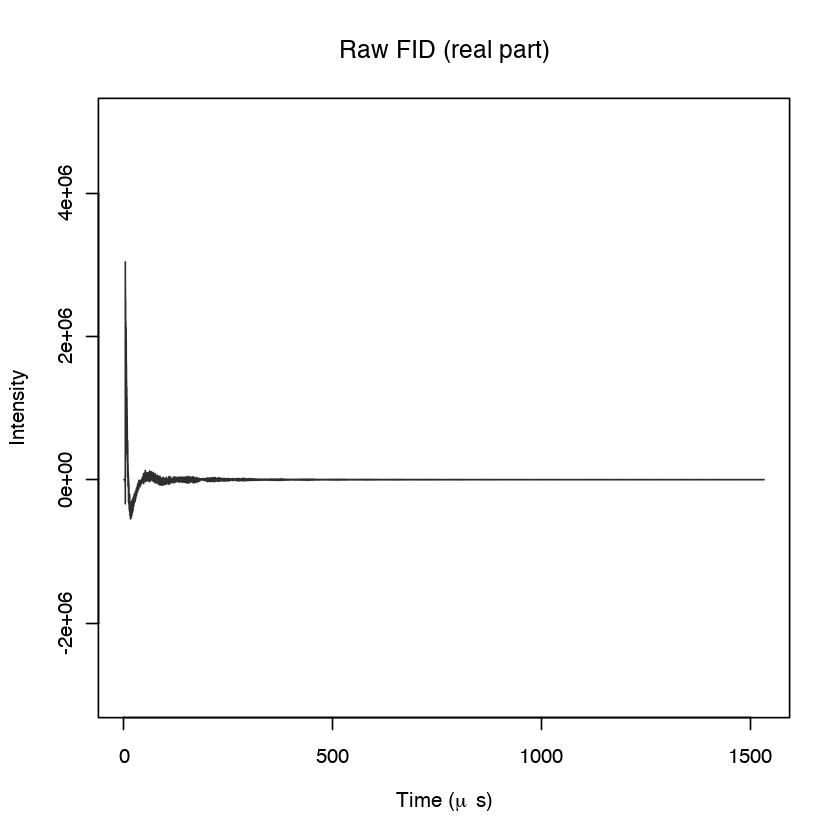

In [8]:
# Visualize raw fid
time <- as.numeric(colnames(Fid_data))*1000
plot(time, Re(Fid_data[spectrIndex,]),type="l", col = col1, xlab=
       expression(paste("Time (", mu,"s)")), ylab = "Intensity", 
     main = "Raw FID (real part)", ylim = c(-3e6,5e6))

In [9]:
# ==== GroupDelayCorrection =================
Fid_data.GDC <- GroupDelayCorrection(Fid_data, Fid_info, verbose =TRUE)

Begin GroupDelayCorrection 
End GroupDelayCorrection 
It lasted 5.848 s user time, 1.716 s system time and 7.935 s elapsed time.


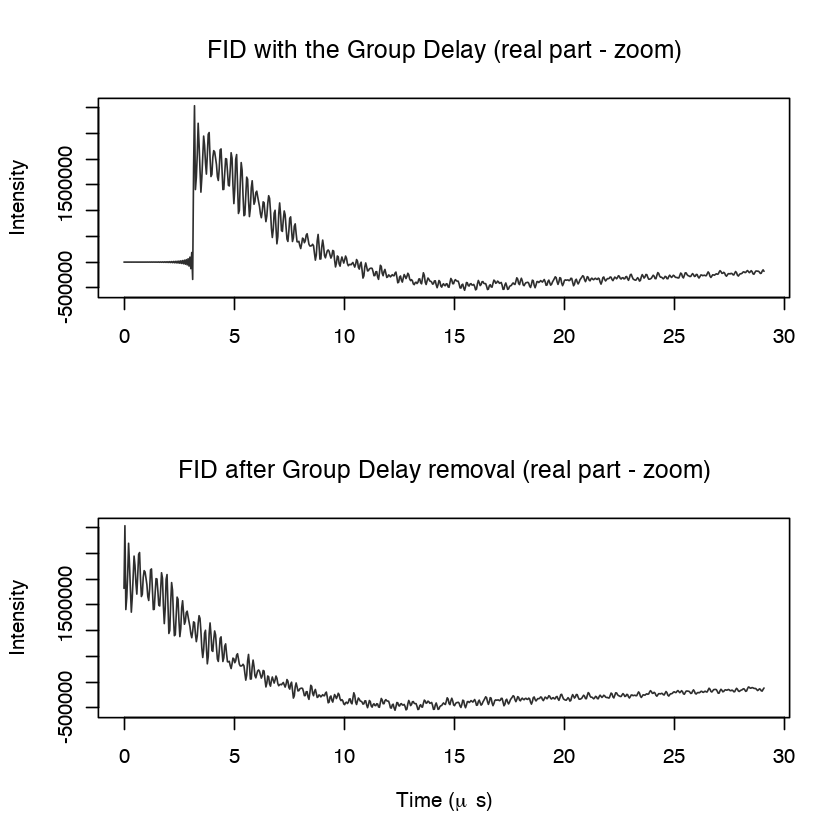

In [10]:
# Visualize changes
par(mfrow=c(2,1))
plot(time[0:700], Re(Fid_data[spectrIndex,0:700]),  
     type = "l", ylab = "Intensity", xlab="", 
     main = "FID with the Group Delay (real part - zoom)", col = col1)
plot(time[0:700], Re(Fid_data.GDC[spectrIndex,0:700]), 
     type="l", ylab = "Intensity", xlab=expression(paste("Time (", mu,"s)")), 
     main="FID after Group Delay removal (real part - zoom)", col = col1)

In [11]:
# ====  SolventSuppression =================
SS.res <- SolventSuppression(Fid_data.GDC, returnSolvent=TRUE)
Fid_data.SS <- SS.res[["Fid_data"]]
SolventRe <- SS.res[["SolventRe"]]

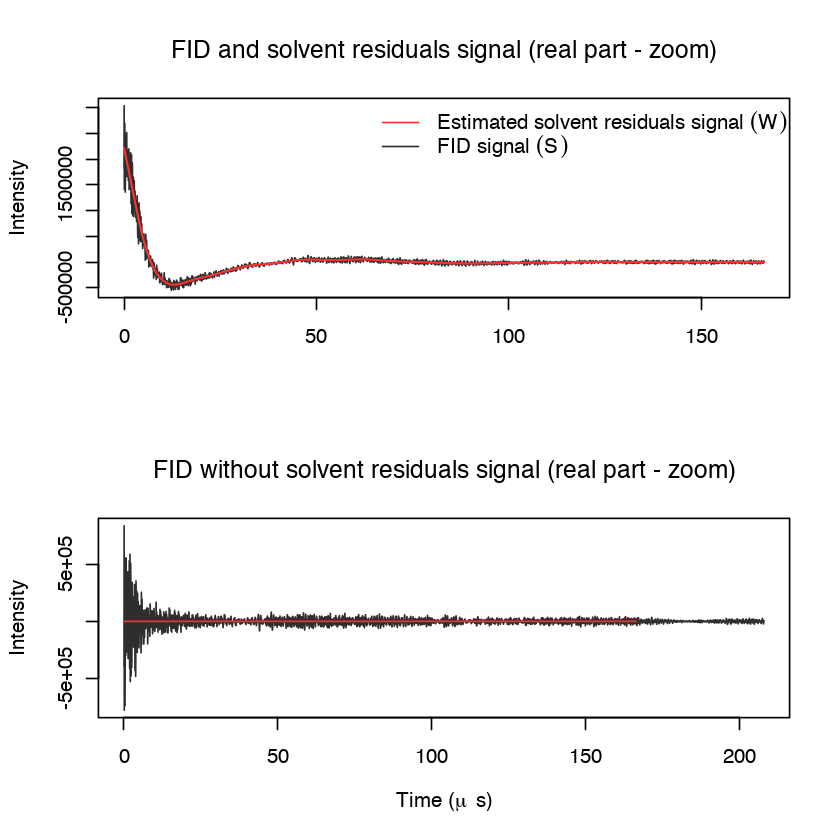

In [12]:
# Visualize changes
par(mfrow=c(2,1))
plot(time[0:4000], Re(Fid_data.GDC[spectrIndex,0:4000]),  col=col1, 
     type="l", ylab = "Intensity", xlab="", 
     main="FID and solvent residuals signal (real part - zoom)")
lines(time[0:4000],SolventRe[spectrIndex,0:4000], col=col2 , lwd = 1.3)
legend("topright", bty = "n", legend = c(expression(paste("Estimated solvent residuals signal ", (italic(W)))), expression(paste("FID signal ", (italic(S))))), 
       col=c(col2, col1),  lty = 1)
plot(time[0:5000], Re(Fid_data.SS[1,0:5000]), col=col1, 
     type="l", ylab = "Intensity", xlab=expression(paste("Time (", mu,"s)")), 
     main="FID without solvent residuals signal (real part - zoom)")
lines(time[0:4000], rep(0, 4000), col=col2)

In [13]:
# ==== Apodization =================
Fid_data.A <- Apodization(Fid_data.SS, Fid_info)

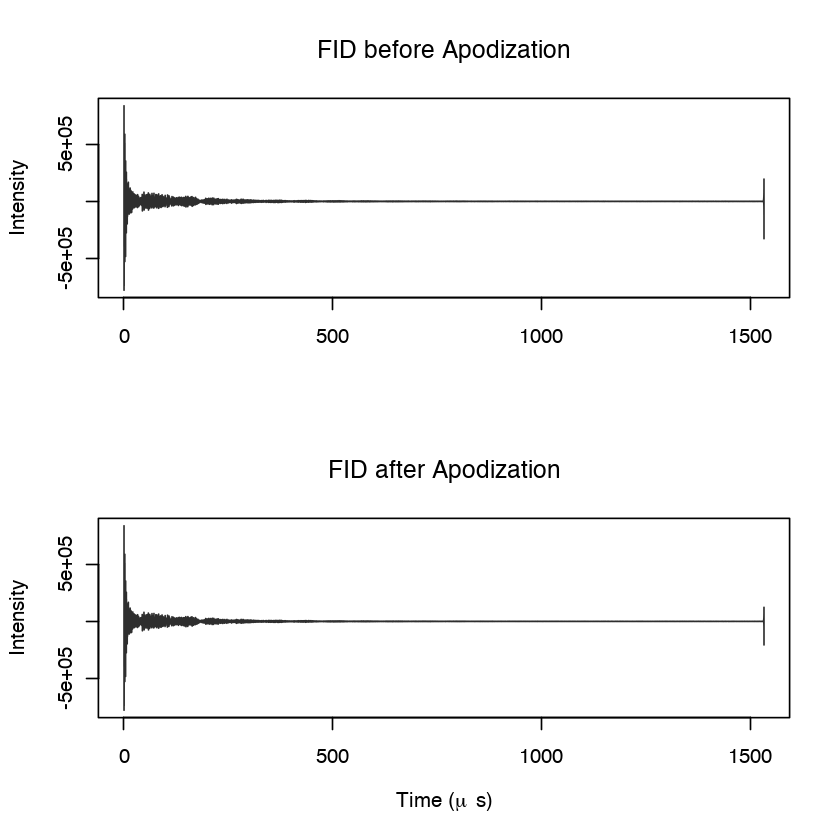

In [14]:
# Visualize changes
par(mfrow=c(2,1))
plot(time, Re(Fid_data.SS[spectrIndex,]),  col=col1, 
     type="l", ylab = "Intensity", xlab="", main="FID before Apodization")
plot(time, Re(Fid_data.A[spectrIndex,]), col=col1, 
     type="l", ylab = "Intensity", xlab=expression(paste("Time (", mu,"s)")), 
     main="FID after Apodization")

In [15]:
# ==== Zero Filling =================
Fid_data.ZF <- ZeroFilling(Fid_data.A, fn = ncol(Fid_data.A))

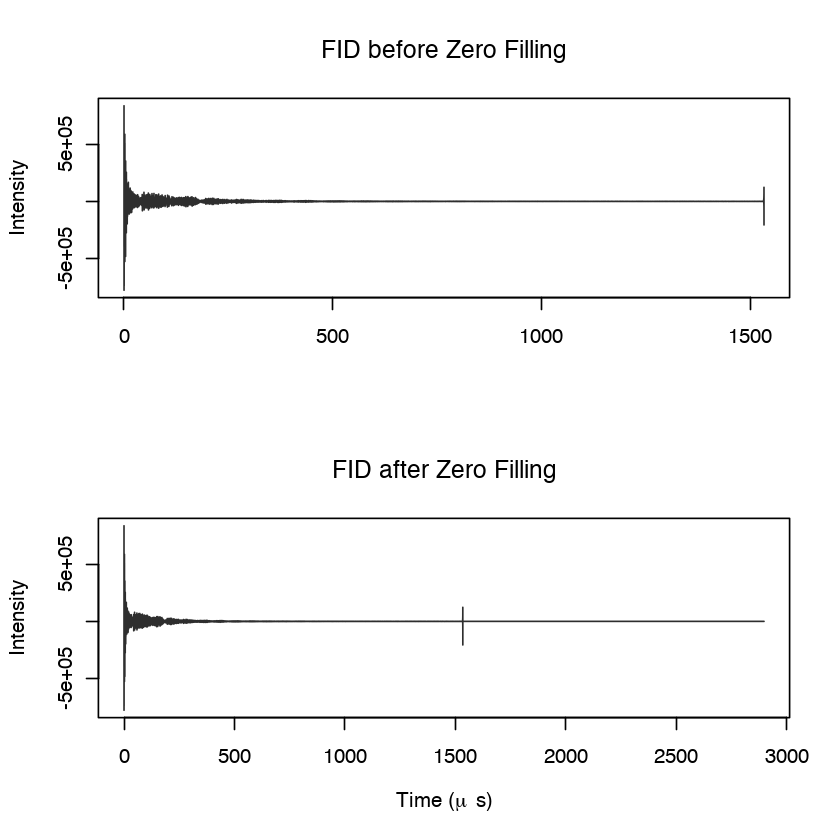

In [16]:
# Visualize changes
par(mfrow=c(2,1))
plot(time, Re(Fid_data.A[spectrIndex,]),  col=col1, 
     type="l", ylab = "Intensity", xlab="", main="FID before Zero Filling")
time <- as.numeric(colnames(Fid_data.ZF))*1000
plot(time, Re(Fid_data.ZF[spectrIndex,]), col=col1, 
     type="l", ylab = "Intensity", xlab=expression(paste("Time (", mu,"s)")), 
     main="FID after Zero Filling")

In [17]:
# ==== FourierTransform =================
RawSpect_data.FT <- FourierTransform(Fid_data.ZF, Fid_info)

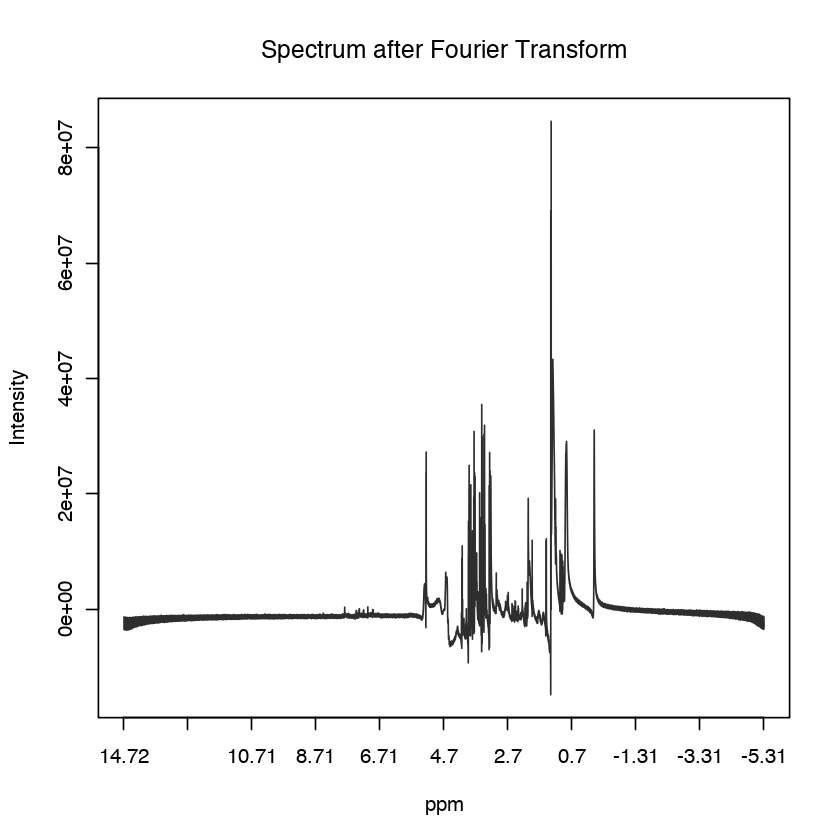

In [18]:
# Visualize Changes
plot(Re(RawSpect_data.FT[spectrIndex,]), col=col1, xaxt="n",
     type="l", ylab = "Intensity", xlab = "ppm", 
     main="Spectrum after Fourier Transform")
at <- seq(1,dim(RawSpect_data.FT)[2], floor(dim(RawSpect_data.FT)[2]/10))
axis(side=1, at = at, 
     labels = round(as.numeric(colnames(RawSpect_data.FT)[at]),2))

In [19]:
# ==== ZeroOrderPhaseCorrection =================
Spectrum_data.ZOPC <- ZeroOrderPhaseCorrection(RawSpect_data.FT)

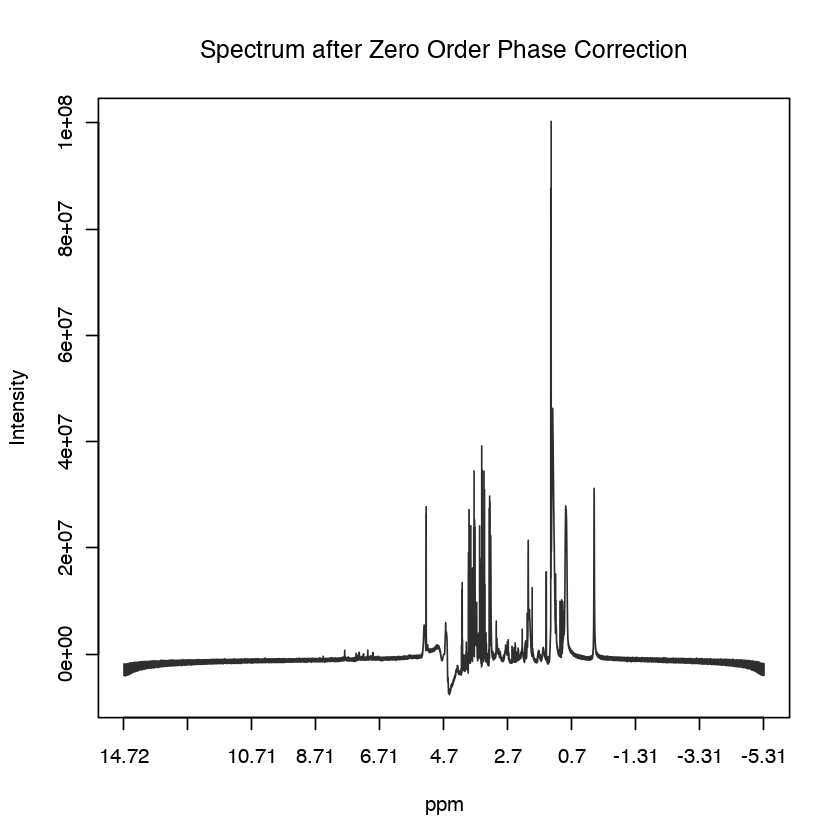

In [21]:
# Visualize Changes
plot(Re(Spectrum_data.ZOPC[spectrIndex,]), col=col1, xaxt="n",
     type="l", ylab = "Intensity", xlab = "ppm", 
     main="Spectrum after Zero Order Phase Correction")
at <- seq(1,dim(Spectrum_data.ZOPC)[2], floor(dim(Spectrum_data.ZOPC)[2]/10))
axis(side=1, at = at, 
     labels = round(as.numeric(colnames(Spectrum_data.ZOPC)[at]),2))

[[1]]


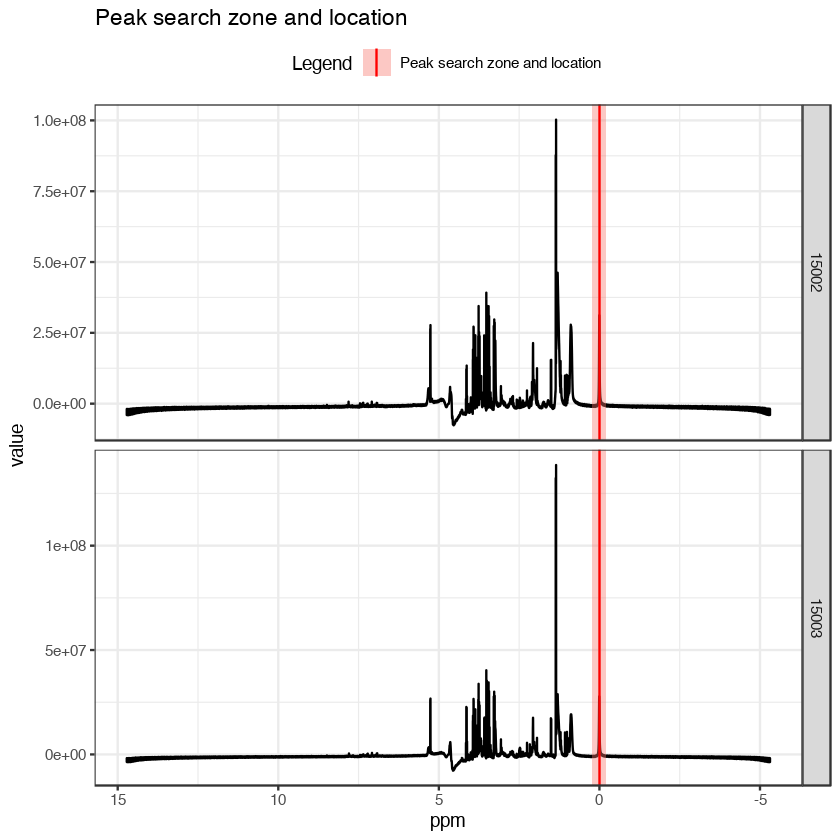

In [22]:
# ==== InternalReferencing =================
target.value <- 0
IR.res <- InternalReferencing(Spectrum_data.ZOPC, Fid_info,
                                        ppm.value = target.value,
                                        rowindex_graph = c(1,2))
IR.res$plots
Spectrum_data.IR <- IR.res$Spectrum_data

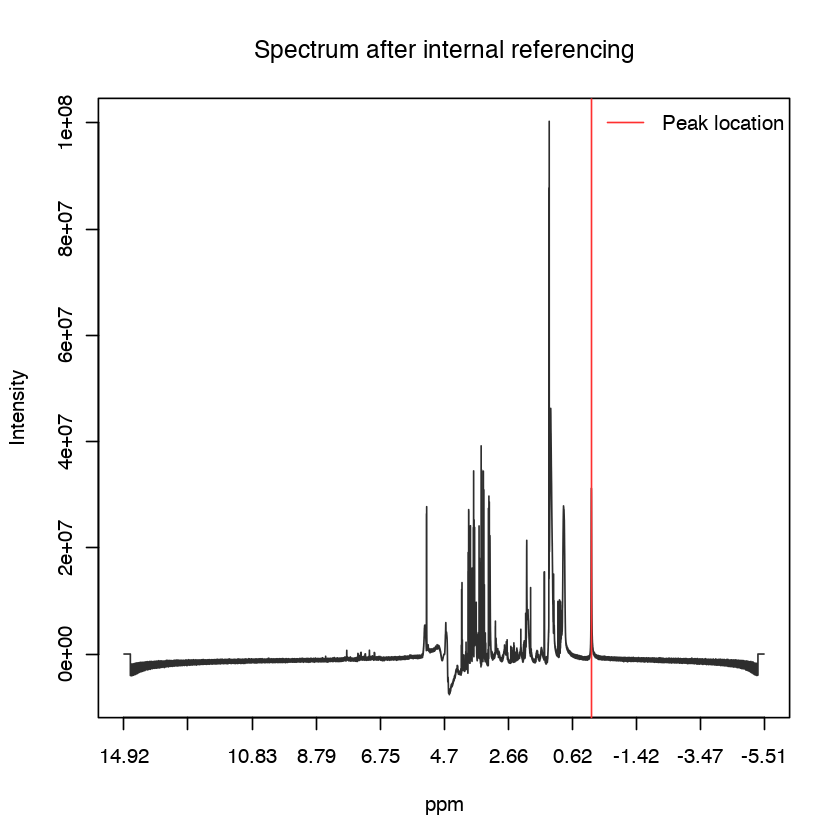

In [23]:
# Visualize changes
ppmvalues <- as.numeric(colnames(Spectrum_data.IR))
plot(Re(Spectrum_data.IR[spectrIndex,]), col=col1, xaxt="n",
     type="l", ylab = "Intensity", xlab = "ppm", 
     main="Spectrum after internal referencing")
at <- seq(1,dim(Spectrum_data.IR)[2], floor(dim(Spectrum_data.IR)[2]/10))
axis(side=1, at = at, 
     labels = round(ppmvalues[at],2))
index <- which(abs(ppmvalues-target.value) == min(abs(ppmvalues-target.value)))
abline(v = index, col= col2)
legend("topright", bty = "n", legend = "Peak location", 
       col=col2,  lty = 1)

In [24]:
# ==== BaselineCorrection =================
BC.res <- BaselineCorrection(Spectrum_data.IR, returnBaseline = TRUE,
                             lambda.bc = 1e8, p.bc = 0.01)

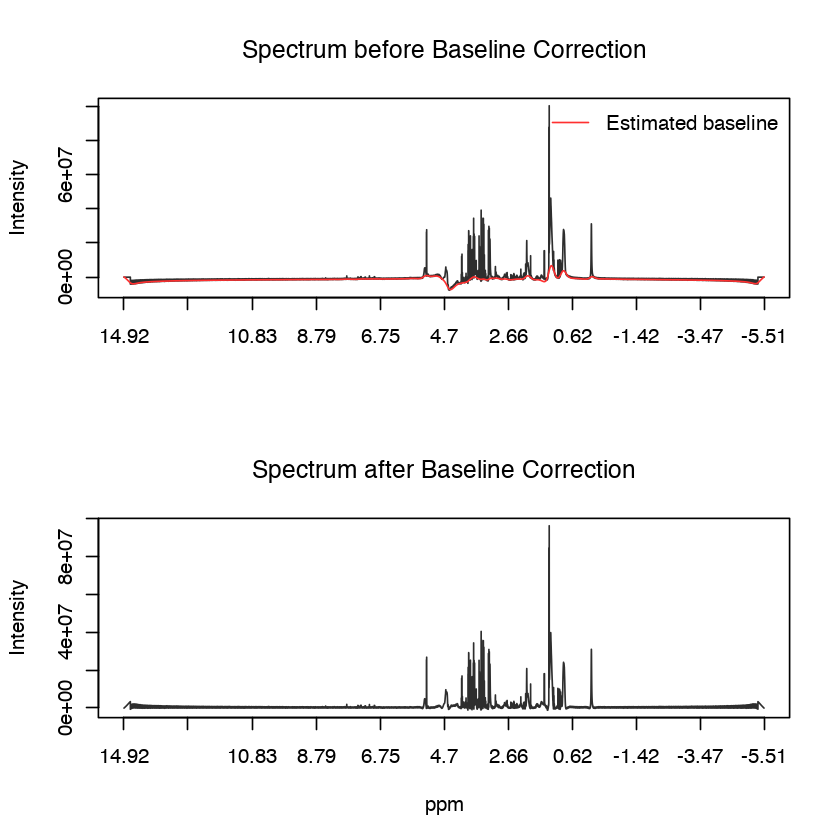

In [25]:
# visualize changes
par(mfrow=c(2,1))
Spectrum_data.BC <- BC.res[["Spectrum_data"]] 
Baseline <- BC.res[["Baseline"]]
plot(Re(Spectrum_data.IR[spectrIndex,]), col=col1, xaxt="n",
     type="l", ylab = "Intensity", xlab = "", 
     main="Spectrum before Baseline Correction")
at <- seq(1,dim(Spectrum_data.IR)[2], floor(dim(Spectrum_data.IR)[2]/10))
axis(side=1, at = at, labels = round(ppmvalues[at],2))
lines(Baseline[,1], col=col2)
legend("topright", bty = "n", legend = "Estimated baseline ", 
       col = col2,  lty = 1)
plot(Re(Spectrum_data.BC[spectrIndex,]), col=col1, xaxt="n",
     type="l", ylab = "Intensity", xlab = "ppm", 
     main="Spectrum after Baseline Correction")
axis(side=1, at = at, labels = round(ppmvalues[at],2))

In [26]:
# ==== NegativeValuesZeroing =================
Spectrum_data.NVZ <- NegativeValuesZeroing(Spectrum_data.BC)

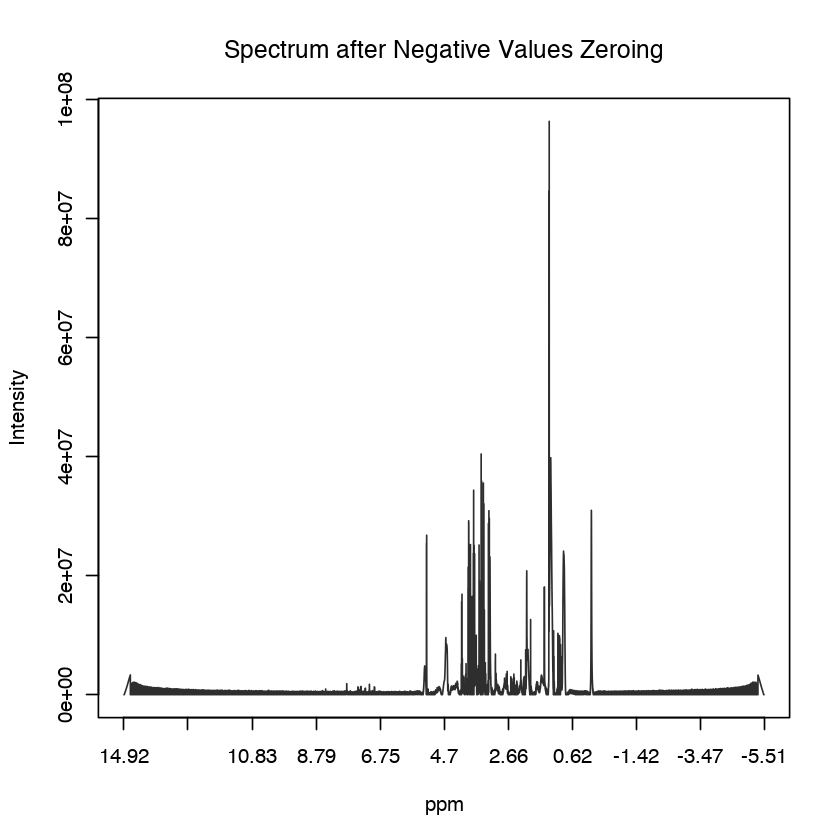

In [27]:
# visualize
plot(Re(Spectrum_data.NVZ[spectrIndex,]), col=col1, xaxt="n",
     type="l", ylab = "Intensity", xlab = "ppm", 
     main="Spectrum after Negative Values Zeroing")
axis(side=1, at = at, labels = round(ppmvalues[at],2))

In [28]:
# ==== Warping =================
W.res <- Warping(Spectrum_data.NVZ, returnWarpFunc = TRUE, 
                 reference.choice = "fixed")
Spectrum_data.W <- W.res[["Spectrum_data"]]
warp_func <- W.res[["Warp.func"]]

In [29]:
par(mfrow=c(2,1))
f <- c(21, 20, 24) # warped spectra index to draw
fen <- c(35560:36480) # x-window
ylim <- c(0, max(c(Re(Spectrum_data.NVZ[c(1, f),fen]), Re(Spectrum_data.W[c(spectrIndex, f),fen]))))

In [30]:
#Re(Spectrum_data.NVZ[1, fen])
nrow(sort(fen))

NULL

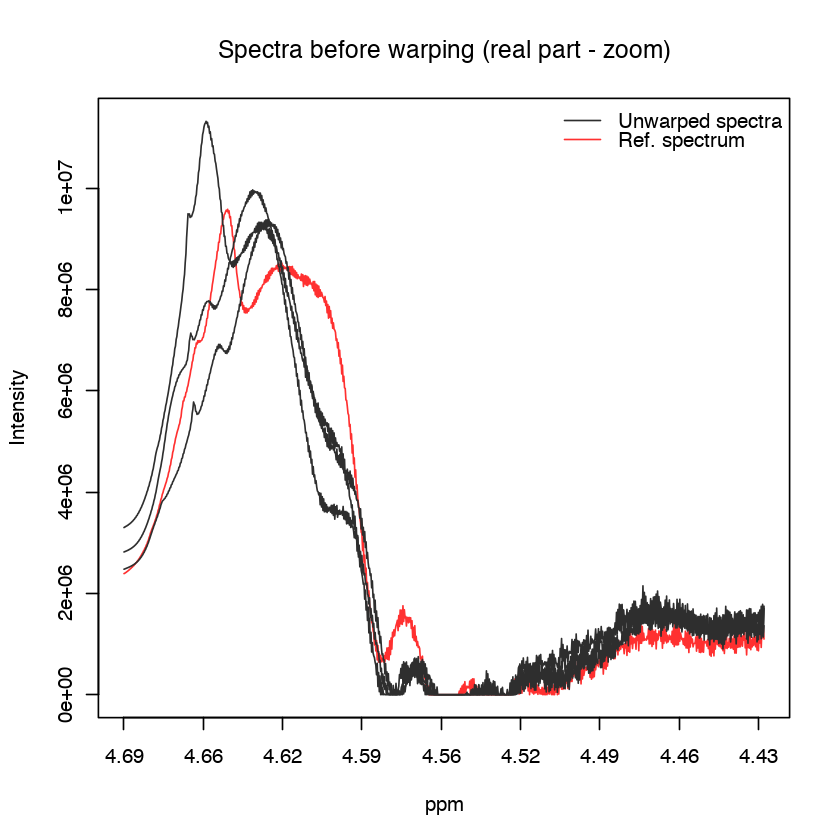

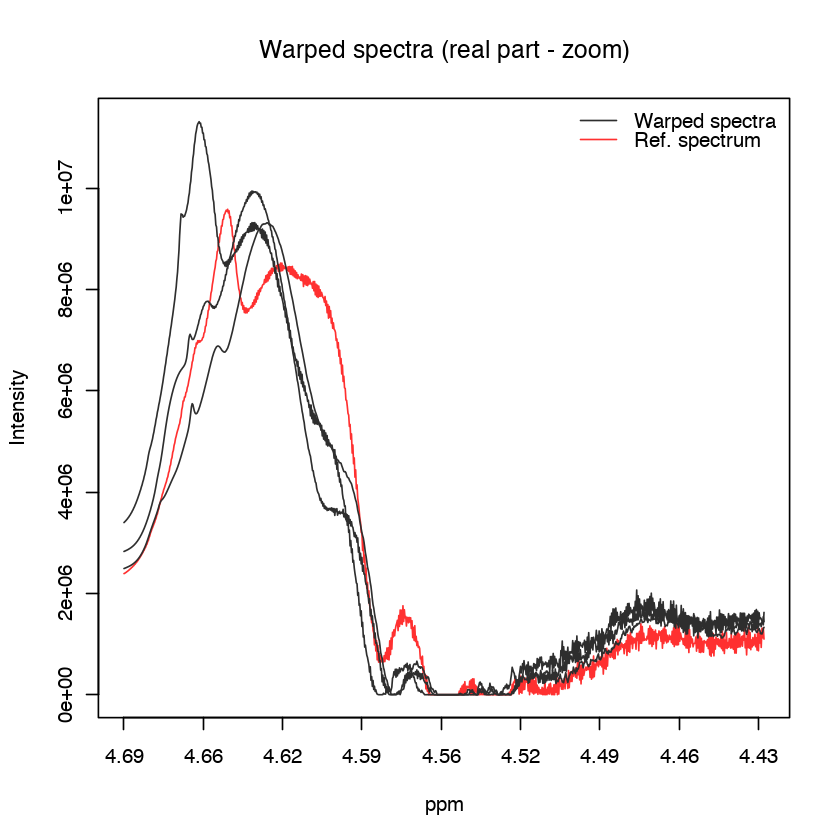

In [31]:
# Unwarped spectra
plot(Re(Spectrum_data.NVZ[1, fen]),   xaxt = "n", col=col2, ylab = "Intensity",ylim=ylim, type="l", xlab="ppm", main="Spectra before warping (real part - zoom)")
legend("topright", bty = "n", y.intersp = 0.8,legend=c("Unwarped spectra","Ref. spectrum "), lty = c(1,1), col=c(col1,col2))    
axis(side=1,  at = seq(1,length(fen), 114), labels = round(as.numeric(colnames(Spectrum_data.NVZ[,fen])[seq(1,length(fen), 114)]),2))
for (j in f) {
  graphics::lines(Re(Spectrum_data.NVZ[j,fen]), col=col1, type="l")
  }
# Warped spectra
plot(Re(Spectrum_data.W[1, fen]), col=col2, xaxt = "n",ylab = "Intensity",ylim=ylim, type="l", xlab="ppm", main="Warped spectra (real part - zoom)")
legend("topright",   bty = "n",  y.intersp = 0.8, legend=c("Warped spectra ","Ref. spectrum "), lty = c(1,1), col=c(col1,col2))    
axis(side=1,  at = seq(1,length(fen), 114), labels = round(as.numeric(colnames(Spectrum_data.NVZ[,fen])[seq(1,length(fen), 114)]),2))
for (j in f) {
  graphics::lines(Re(Spectrum_data.W[j,fen]), col=col1, type="l")
  }

In [32]:
# ==== WindowSelection =================
Spectrum_data.WS <- WindowSelection(Spectrum_data.W, from.ws = 10, 
                                    to.ws = 0.2)

In [33]:
dim(Spectrum_data.WS)
names(Spectrum_data.WS)

[1]   699 34067

NULL

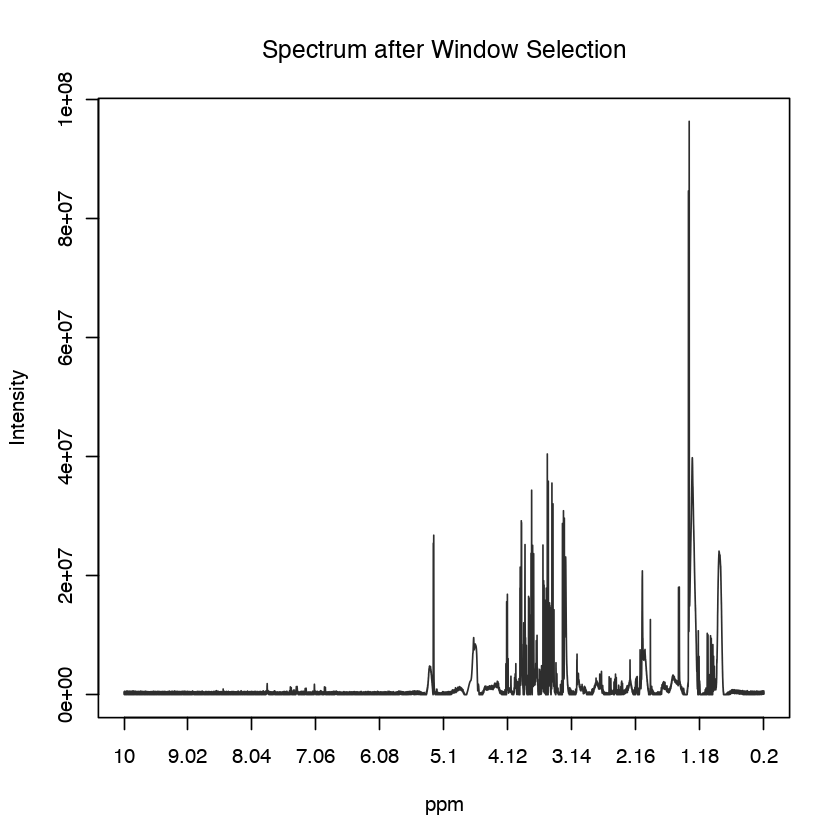

In [34]:
# visualize
at <- seq(1,dim(Spectrum_data.WS)[2], floor(dim(Spectrum_data.WS)[2]/10))
ppmvalues <- as.numeric(colnames(Spectrum_data.WS))
plot(Re(Spectrum_data.WS[spectrIndex,]), col = col1, xaxt = "n",
     type = "l", ylab = "Intensity", xlab = "ppm", 
     main = "Spectrum after Window Selection")
axis(side = 1, at = at, labels = round(ppmvalues[at],2))

In [35]:
# ==== Bucketing =================
# by defualt this function divides by the number of bins/buckets the user wants
# the default value is 500 bins/buckets. the spectra span from 0.2 to 10 ppm
# which means that each bin/bucket is 0.0196 ppm in width.
Spectrum_data.B500 <- Bucketing(Spectrum_data.WS, intmeth = "t", width = TRUE, mb = 0.02)
Spectrum_data.B5000 <- Bucketing(Spectrum_data.WS, intmeth = "t", width = TRUE, mb = 0.002)
#write.csv(Spectrum_data.B, file = "/Users/morris/Box/Hall_Lab/Projects/MTBLS_explore/MTBLS1/output/PepsNMR_output/MTBLS326_PepsNMR_bin_testonly.csv")

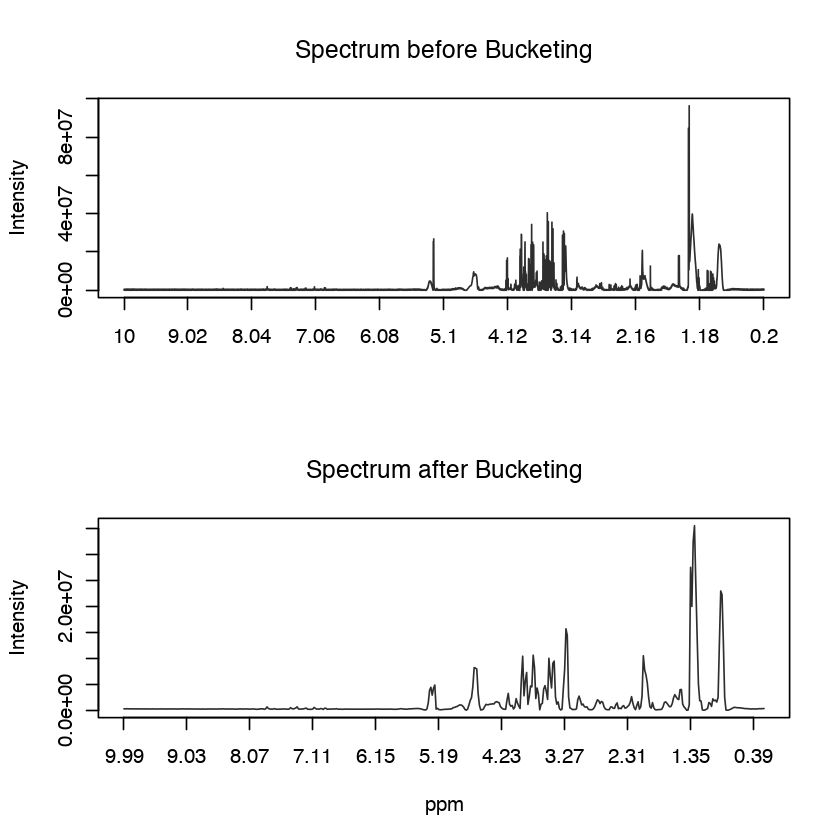

In [36]:
# visualize
par(mfrow=c(2,1))
at <- seq(1,dim(Spectrum_data.WS)[2], floor(dim(Spectrum_data.WS)[2]/10))
ppmvalues <- as.numeric(colnames(Spectrum_data.WS))
plot(Re(Spectrum_data.WS[spectrIndex,]), col = col1, xaxt = "n",
     type = "l", ylab = "Intensity", xlab = "", 
     main = "Spectrum before Bucketing")
axis(side = 1, at = at, labels = round(ppmvalues[at],2))
at <- seq(1,dim(Spectrum_data.B500)[2], floor(dim(Spectrum_data.B500)[2]/10))
ppmvalues <- as.numeric(colnames(Spectrum_data.B500))
plot(Re(Spectrum_data.B500[spectrIndex,]), col = col1, xaxt = "n",
     type = "l", ylab = "Intensity", xlab = "ppm", 
     main = "Spectrum after Bucketing")
axis(side = 1, at = at, labels = round(ppmvalues[at],2))

In [37]:
# ==== RegionRemoval =================
# "The type of spectra can be NULL to manually specify the area to be removed otherwise it is
#specified as typeofspectra = "serum" or typeofspectra = "urine" and the removed area are for
#typeofspectra = "serum": water (4.5 - 5.1 ppm) and for typeofspectra = "urine": water, uree [sic]
# and maleic acid (4.5 - 6.1 ppm)."
Spectrum_data.RR500 <- RegionRemoval(Spectrum_data.B500, 
                                     typeofspectra = "serum")
Spectrum_data.RR5000 <- RegionRemoval(Spectrum_data.B5000, 
                                      typeofspectra = "serum")

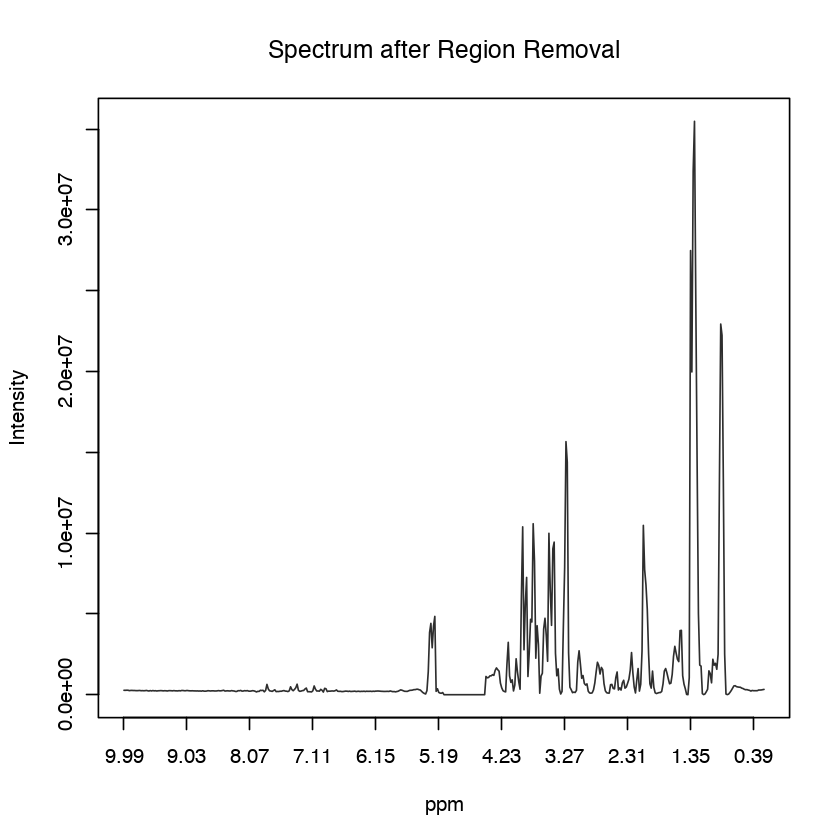

In [38]:
# visualize
plot(Re(Spectrum_data.RR500[spectrIndex,]), col = col1, xaxt = "n",
     type = "l", ylab = "Intensity", xlab = "ppm", 
     main = "Spectrum after Region Removal")
axis(side = 1, at = at, labels = round(ppmvalues[at],2))

In [39]:
# ==== Normalization =================
Spectrum_data.N500 <- Normalization(Spectrum_data.RR500, type.norm = "mean")
Spectrum_data.N5000 <- Normalization(Spectrum_data.RR5000, type.norm = "mean")
# renaming "Spectrum_data.N" to "data" to export data
# writing final output to csv
#Spectrum_data.N

In [40]:
write.csv(Spectrum_data.N500, file = norm_bin_500_path)
write.csv(Spectrum_data.N5000, file = norm_bin_5000_path)

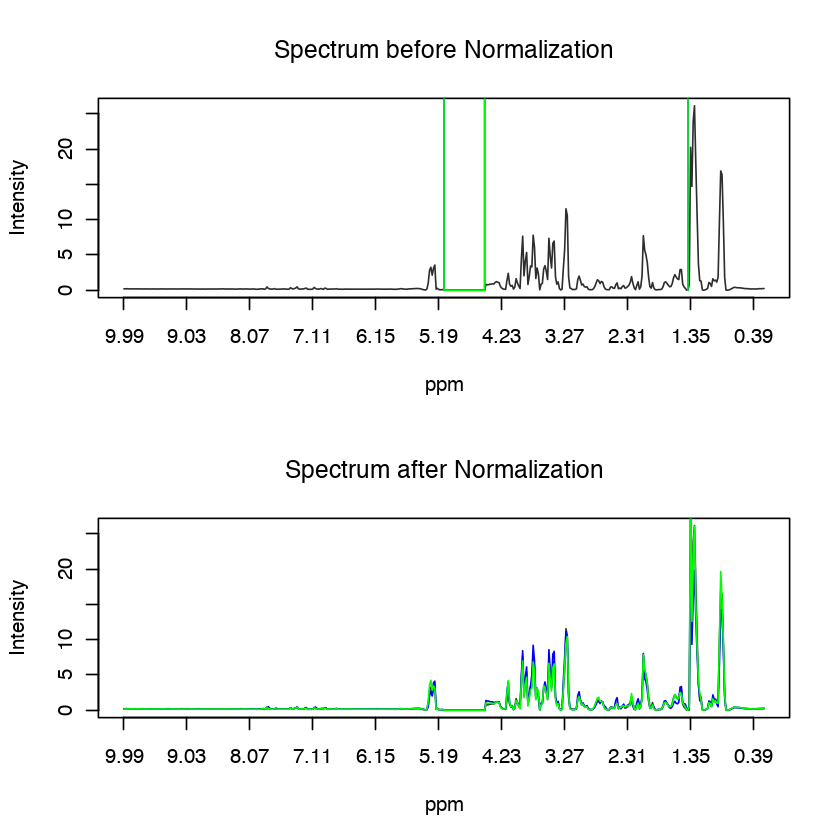

In [43]:
par(mfrow=c(2,1))
plot(Re(Spectrum_data.N500[spectrIndex,]), col = col1, xaxt = "n",
     type = "l", ylab = "Intensity", xlab = "ppm", 
     main = "Spectrum before Normalization")
axis(side = 1, at = at, labels = round(ppmvalues[at],2))
lines(Re(Spectrum_data.RR500[2,]), col = "blue")
lines(Re(Spectrum_data.RR500[3,]), col = "green")
plot(Re(Spectrum_data.N500[spectrIndex,]), col = col1, xaxt = "n",
     type = "l", ylab = "Intensity", xlab = "ppm", 
     main = "Spectrum after Normalization")
axis(side = 1, at = at, labels = round(ppmvalues[at],2))
lines(Re(Spectrum_data.N500[2,]), col = "blue")
lines(Re(Spectrum_data.N500[3,]), col = "green")

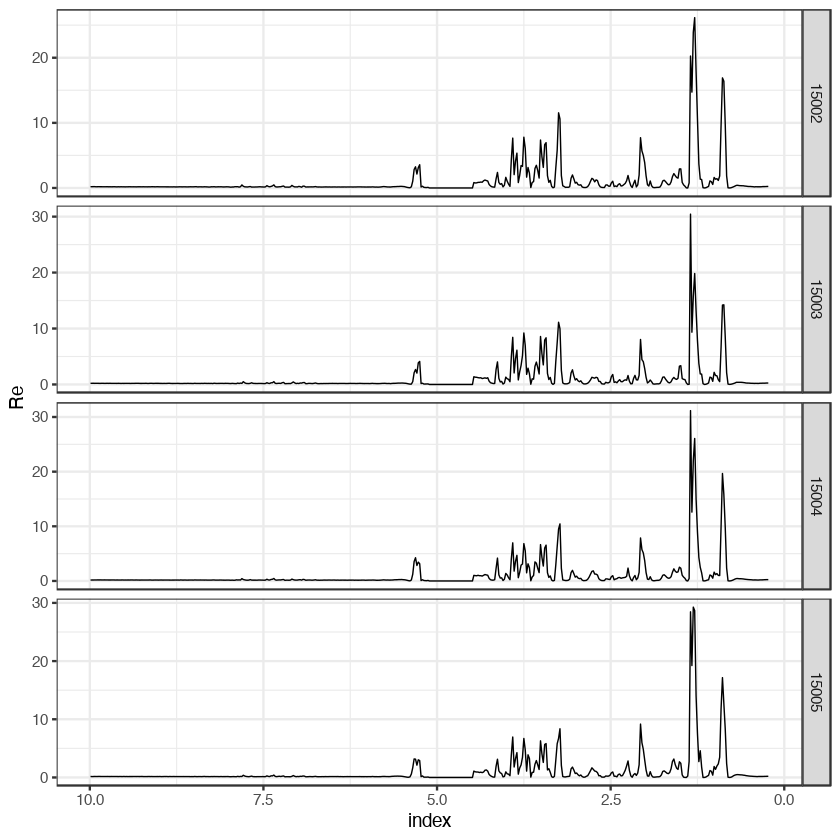

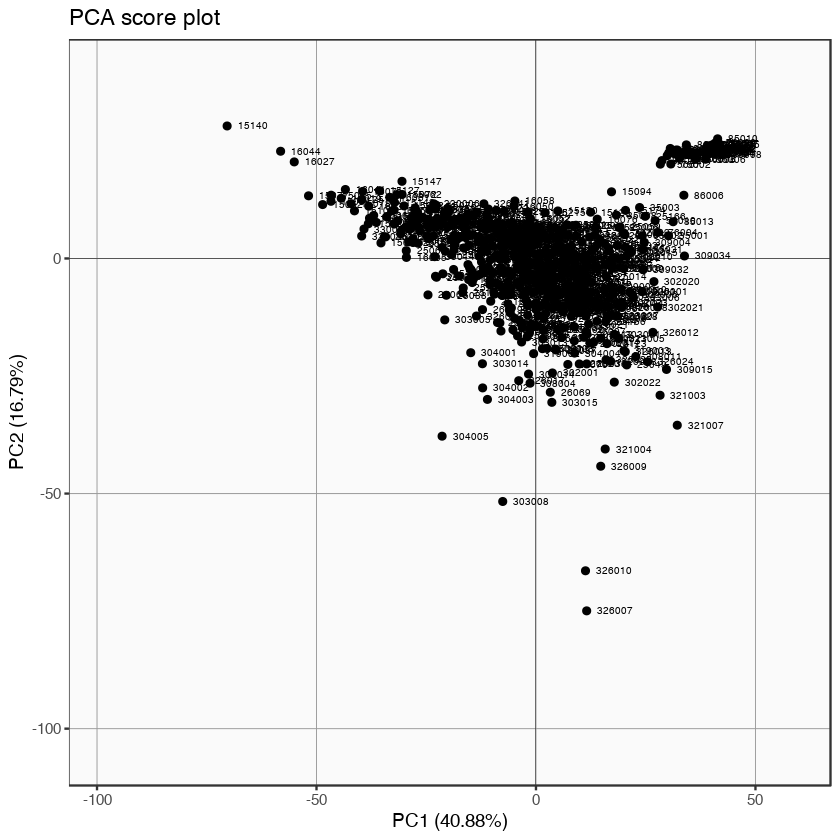

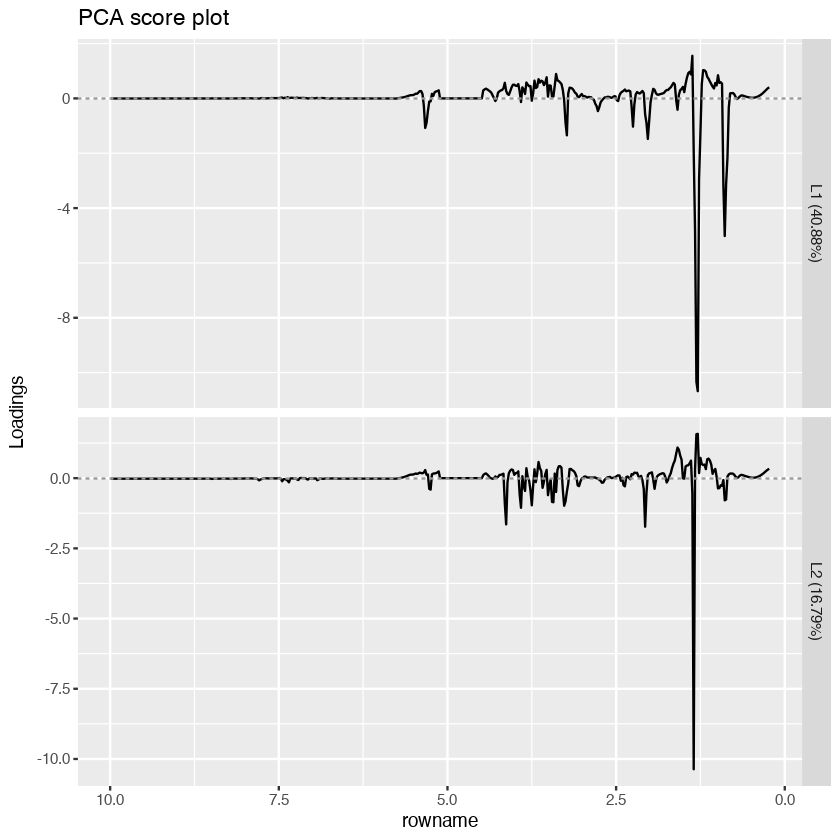

In [44]:
# ==== Drawing PCA ====
# Left class as blank
Draw(Spectrum_data.N500[1:4,], type.draw = c("signal"), 
     subtype= "stacked", output = c("default"))
# Left class as blank
Draw(Spectrum_data.N500, type.draw = c("pca"), 
     output = c("default"), 
     type.pca = "scores", height = 960, width = 1280)

Draw(Spectrum_data.N500, type.draw = c("pca"), 
     output = c("default"),
     type.pca = "loadings")